<a href="https://colab.research.google.com/github/MariaLochan25/deep_learning/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 851s 5us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

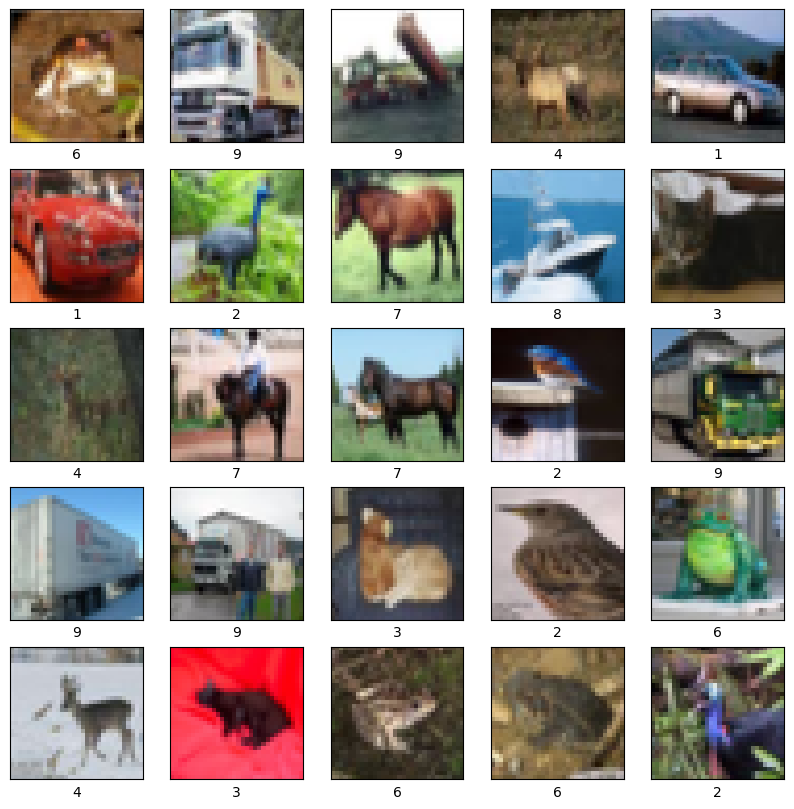

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i][0])

### Augmentation

In [ ]:
#augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

### Model

In [ ]:
model = tf.keras.Sequential(
    [
        data_augmentation,

        layers.Rescaling(1 / 255.0),

        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

c:\Users\hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Compile
- fit
- evaluate
- save

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#stop at maximum accuracy and restore the best weights
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model.evaluate(x_test, y_test)
model.save("cifar10_model.keras")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.3980 - loss: 1.6437 - val_accuracy: 0.4897 - val_loss: 1.4248
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5233 - loss: 1.3312 - val_accuracy: 0.5609 - val_loss: 1.2534
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5651 - loss: 1.2259 - val_accuracy: 0.6089 - val_loss: 1.1161
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5928 - loss: 1.1496 - val_accuracy: 0.6055 - val_loss: 1.1180
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6153 - loss: 1.0973 - val_accuracy: 0.6186 - val_loss: 1.1029
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6268 - loss: 1.0609 - val_accuracy: 0.6080 - val_loss: 1.1240
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6383 - loss: 1.0260 - val_accuracy: 0.6630 - val_loss: 0.9747
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6468 -

### Ploting of train accu and val accu & train loss and val loss

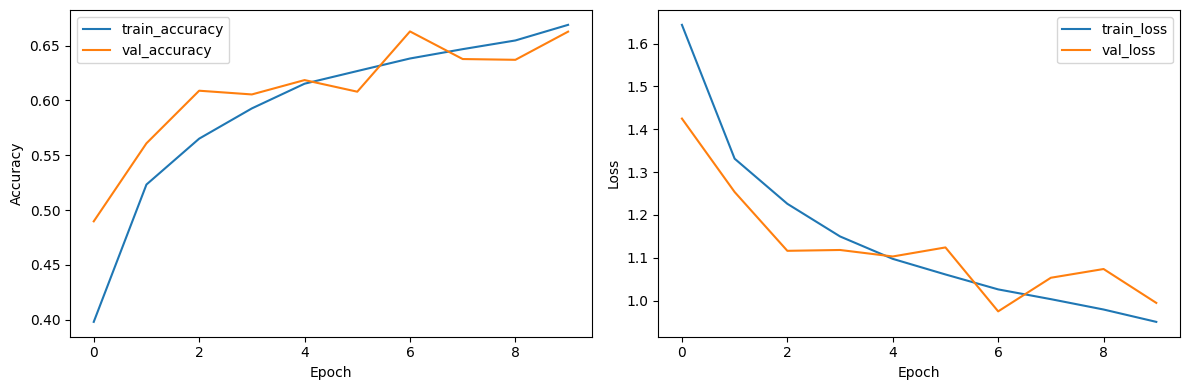

In [ ]:
#plot training history
history = model.history.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="train_accuracy")
plt.plot(history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
